<h1 style="color:rgb(0,120,170)">Factor Analysis</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1 (25 Points): Generate toy data for FA</h2>

Generate an $n \times m$ data matrix $\mathbf{X}$, i.e. $n=100$ samples with $m=5$ features, according to the generative factor analysis model with $l=3$ factors. Further, fill $\mathbf{U}$ with random integers from the set $\{-3, \dots, 3\}$ and $\mathbf{\Psi}$ with random integers from the set $\{1, \dots, 3\}$. To save memory, implement $\mathbf{\Psi}$ as a vector. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1994)
n = 2
m = 2
l = 1
U_true = np.random.randint(low=-3, high=4, size=(m,l))
Psi_true = np.random.randint(low=1, high=4, size=m)

I = np.identity((l))

# Y ~ N(0, I)
Y = np.random.multivariate_normal(np.zeros(l), I, size=n)

# e ~ N(0, psi)
e = np.random.multivariate_normal(np.zeros(m),
                                  np.diag(Psi_true),
                                  size=n)
# X = Uy + e
X = Y @ U_true.T + e
U_true.T, Psi_true, I, Y, X, e
# X.shape

(array([[3, 0]]),
 array([3, 1]),
 array([[1.]]),
 array([[-1.30198171],
        [-0.9837465 ]]),
 array([[-4.81456008,  1.34769228],
        [-4.29984204, -1.50279666]]),
 array([[-0.90861494,  1.34769228],
        [-1.34860253, -1.50279666]]))

<h2 style="color:rgb(0,120,170)">Task 2 (25 Points): Derive GD for FA</h2>

Construct the negative log-likelihood $\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})$, according to the FA model assumptions and calculate its gradients with respect to the model parameters, i.e. $\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi})$ and $\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi})$. 


For differentiation of matrix multiplication we used :  https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf according to Thomas Adler: https://moodle.jku.at/jku/mod/forum/discuss.php?d=69315

By just plug in the covariance matrix into the normal distribution, we get:
$$
\begin{aligned}
p(x; U, \Psi) &= \frac{1}{\sqrt{(2 \pi)^m \cdot det( UU^\intercal + \Psi)}}e^{-\frac{1}{2}x^\intercal (UU^\intercal + \Psi)^{-1}x }
\end{aligned}
$$

Liklihood of the normal distribution:

$$
\begin{aligned}
\mathcal{L}(X; U, \Psi) &= \prod_{i=1}^{n}p(x_i; U, \Psi)
\end{aligned}
$$

Negative log-likelihood:
$$
\begin{aligned}
\ell(\mathbf{U}, \mathbf{\Psi}) =- \ln\mathcal{L}(X; U, \Psi) &=  -\sum_{i=1}^{n} \ln p(x_i; U, \Psi) \\
&= -\sum_{i=1}^{n} \ln \big[\frac{1}{\sqrt{(2 \pi)^m \cdot det( UU^\intercal + \Psi)}}e^{-\frac{1}{2}x_i^\intercal (UU^\intercal + \Psi)^{-1}x_i } \big] \\
&= -\sum_{i=1}^{n} \ln \big[\frac{1}{\sqrt{(2 \pi)^m \cdot det( UU^\intercal + \Psi)}}\big] -\frac{1}{2}x_i^\intercal (UU^\intercal + \Psi)^{-1}x_i \\
&= -\sum_{i=1}^{n} -\frac{m}{2}\ln((2 \pi)) -\frac{1}{2} \ln(det( UU^\intercal + \Psi)) -\frac{1}{2}x_i^\intercal (UU^\intercal + \Psi)^{-1}x_i \\
&= \sum_{i=1}^{n} \frac{m}{2}\ln((2 \pi)) +\frac{1}{2} \ln(det( UU^\intercal + \Psi)) +\frac{1}{2}x_i^\intercal (UU^\intercal + \Psi)^{-1}x_i
\\
&= \frac{mn}{2}\ln((2 \pi)) +\frac{n}{2} \ln(det( UU^\intercal + \Psi)) +\frac{1}{2} \sum_{i=1}^{n} x_i^\intercal (UU^\intercal + \Psi)^{-1}x_i
\end{aligned}
$$

Relevant equivalent transformations from the matrix cookbook and notes: 

$$
\begin{aligned}
\frac{\partial \det(X)}{\partial X} &= \det(X)(X^{-1})^T\qquad (49) \\
\frac{\partial a^T X^{-1}b}{\partial X} &= -X^{-T} ab^\intercal X^{-T} \qquad (61) \\
\frac{\partial B^T X^T Xc}{\partial X} &= X(bc^T+cb^T) \qquad (77) \\
X^{-T} &= (X^{-1})^{-T} = (X^{T})^{-1} \qquad (*)\\
\end{aligned}
$$

Substitute $W := UU^\intercal + \Psi$ to get:
$$
\begin{aligned}
\ell(W)  &= \frac{mn}{2}\ln((2 \pi)) +\frac{n}{2} \ln(\det(W)) +\frac{1}{2} \sum_{i=1}^{n} x_i^\intercal (W)^{-1}x_i
\end{aligned}
$$

Take the gradient w.r.t $W$:
$$
\begin{aligned}
\frac{\partial \ell(W)}{\partial W} &= \frac{n}{2} \frac{1}{\det(W)}\det(W)W^{-T} + \frac{1}{2} \sum_{i=1}^{n} -W^{-T}x_i x_i^T W^{-T} \\
&= \frac{n}{2} W^{-T} - \frac{1}{2} \sum_{i=1}^{n} W^{-T}x_i x_i^T W^{-T} \\
\end{aligned}
$$

Resubstitute of $W$ to $UU^\intercal + \Psi$:

$$
\begin{aligned}
\frac{\partial \ell(\mathbf{U}, \mathbf{\Psi})}{\partial UU^\intercal + \Psi} &= \frac{n}{2} (UU^\intercal + \Psi)^{-T} - \frac{1}{2} \sum_{i=1}^{n} (UU^\intercal + \Psi)^{-T}x_i x_i^T (UU^\intercal + \Psi)^{-T} \\
\end{aligned}
$$


Using the chainrule w.r.t $U$:
$$ \frac{\partial \ell(\mathbf{U}, \mathbf{\Psi})}{\partial UU^\intercal + \Psi} \frac{\partial UU^\intercal + \Psi}{\partial U}$$

$$
\begin{aligned}
\frac{\partial \ell(\mathbf{U}, \mathbf{\Psi})}{\partial UU^\intercal + \Psi} \frac{\partial UU^\intercal + \Psi}{\partial U} &= n (UU^\intercal + \Psi)^{-T}U^T - \sum_{i=1}^{n} (UU^\intercal + \Psi)^{-T}x_i x_i^T (UU^\intercal + \Psi)^{-T}U^T \\
\end{aligned}
$$


Using the chainrule w.r.t $\Psi$:
$$ \frac{\partial \ell(\mathbf{U}, \mathbf{\Psi})}{\partial UU^\intercal + \Psi} \frac{\partial UU^\intercal + \Psi}{\partial \Psi}$$

$$
\begin{aligned}
\frac{\partial \ell(\mathbf{U}, \mathbf{\Psi})}{\partial UU^\intercal + \Psi} \frac{\partial UU^\intercal + \Psi}{\partial \Psi} &= \frac{n}{2} (UU^\intercal + \Psi)^{-T} -\frac{1}{2} \sum_{i=1}^{n} (UU^\intercal + \Psi)^{-T}x_i x_i^T (UU^\intercal + \Psi)^{-T} \\
\end{aligned}
$$


<h2 style="color:rgb(0,120,170)">Task 3 (25 Points): Implement GD for FA</h2>

Use your results from the previous task to implement gradient descent on the negative log-likelihood for factor analysis. Initialize $\mathbf{U}$ and $\mathbf{\Psi}$ randomly uniform in $[-0.1, 0.1]$. To speed up computations, use the matrix inversion lemma $(\mathbf{UU}^\top + \mathbf{\Psi})^{-1} = \mathbf{\Psi}^{-1} - \mathbf{\Psi}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{U^\top \mathbf{\Psi}^{-1} \mathbf{U}})^{-1}\mathbf{U}^\top \mathbf{\Psi}^{-1}$ wherever possible and adjust the learning rate properly. Since we know the true parameters $\bar{\mathbf{U}}$ and $\bar{\mathbf{\Psi}}$ for our toy data set, we can measure the loss by $\lVert \bar{\mathbf{U}}\bar{\mathbf{U}}^\top + \bar{\mathbf{\Psi}} - \mathbf{U}\mathbf{U}^\top - \mathbf{\Psi} \rVert$. Visualize the learning progress over 1000 update steps of 10 runs which differ only by initializiation in terms of this matrix (i.e. Frobenius) norm expression.

In [2]:
########## YOUR SOLUTION HERE ##########

<h2 style="color:rgb(0,120,170)">Task 4 (25 Points): Implement EM for FA</h2>

Implement expectation maximization for factor analysis. Use the same data and initialization scheme as in the previous task. Visualize the learning progress over 100 update steps in terms of the loss function $\lVert \bar{\mathbf{U}}\bar{\mathbf{U}}^\top + \bar{\mathbf{\Psi}} - \mathbf{U}\mathbf{U}^\top - \mathbf{\Psi} \rVert$ for 10 runs which differ only by initialization. Compare your results to those in the previous exercise and interpret the ovserved differences. 

In [3]:
# empirical covariance matrix
def scale_C(mat):
    scaled = mat - mat.mean(axis=0)
    n = len(mat)
    return (scaled.T @ scaled) / n

# DO Not trust Exercise Slides!!
--- 
## Trust in Sepp

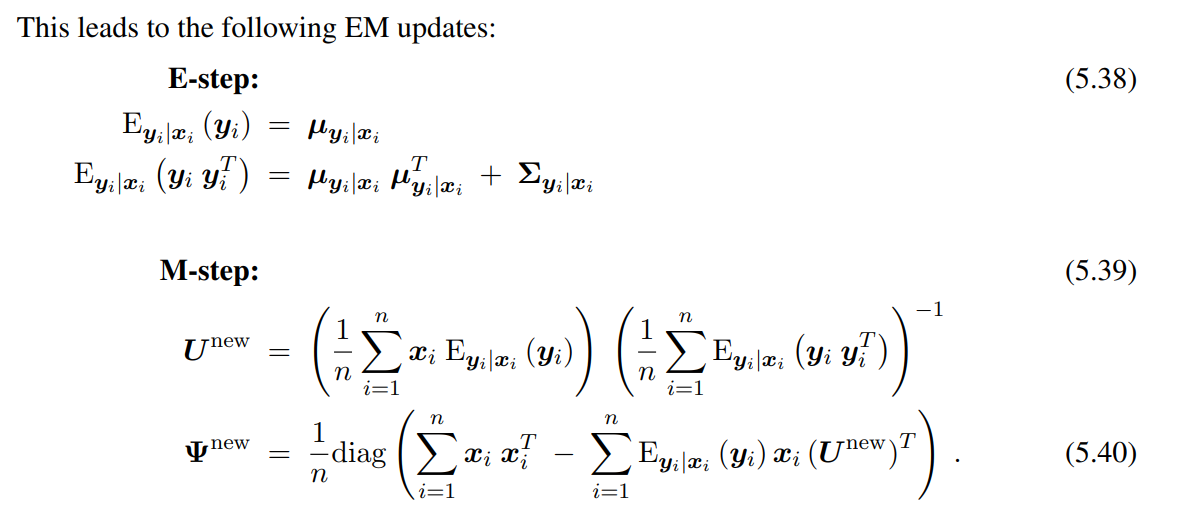

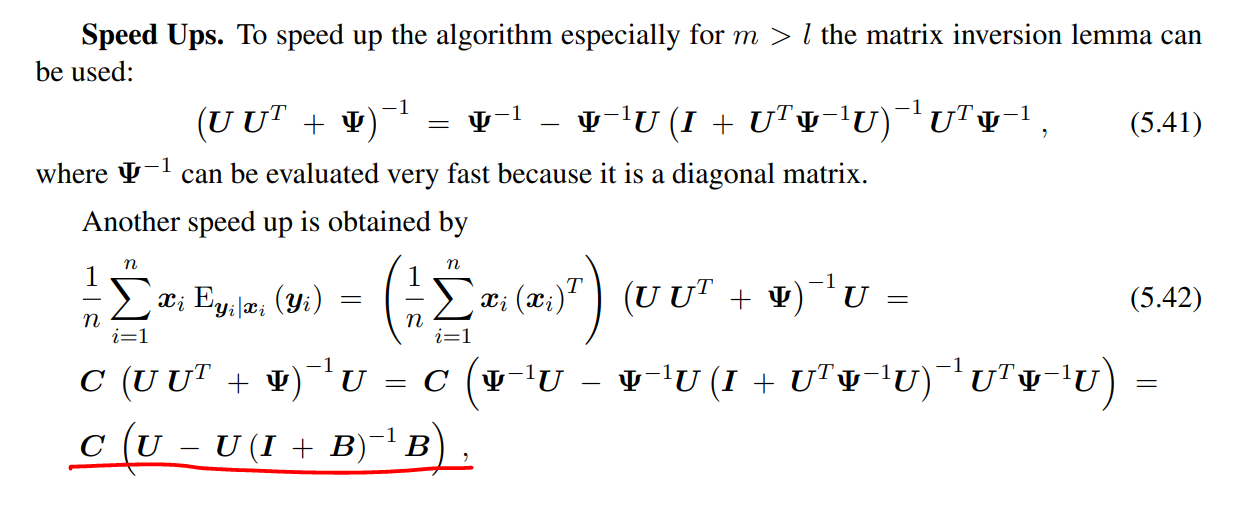

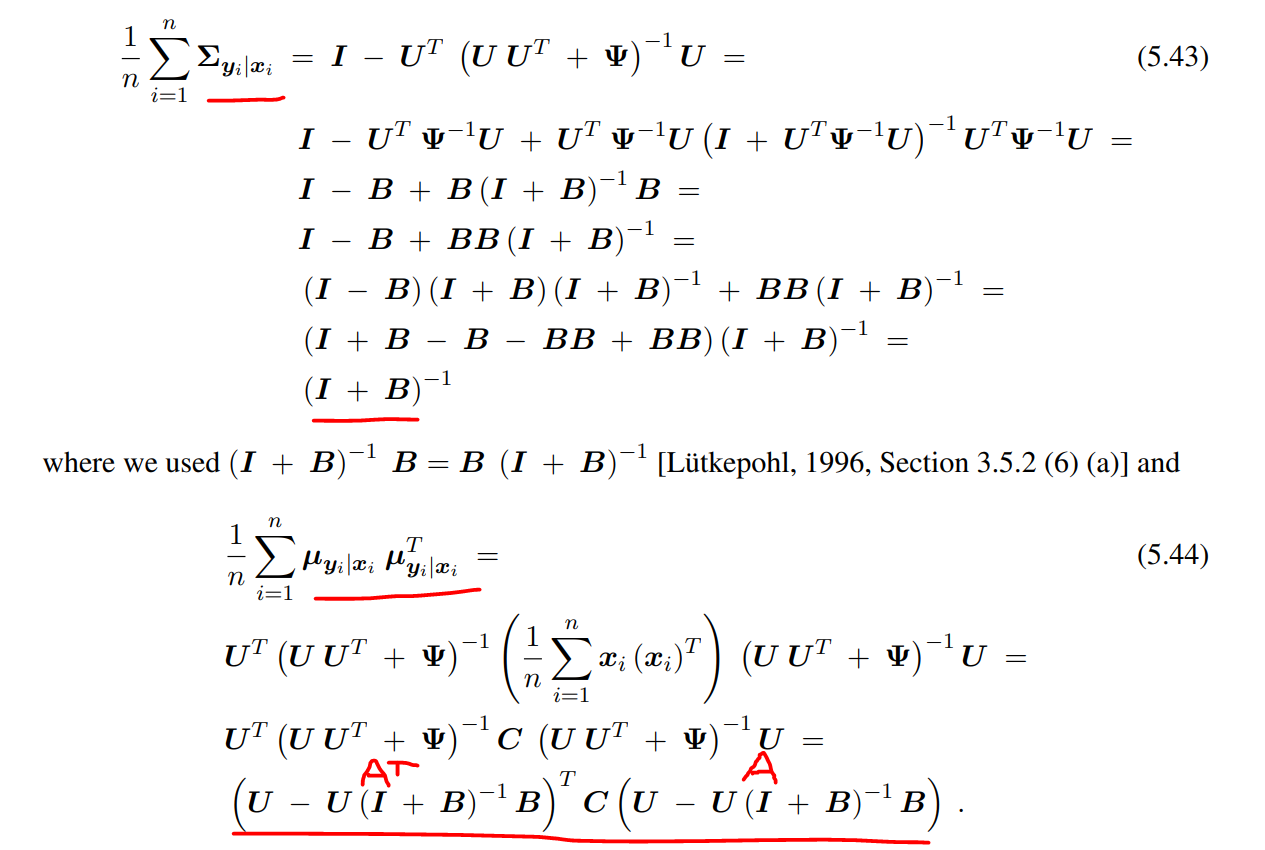

In [4]:
# UE Slides approach
# def helper(U, Psi, x_i):
#     return U.T @ np.linalg.inv(U @ U.T + Psi) @ x_i

# def E_yx(U, Psi, X):
#     return np.asarray([helper(U, Psi, x_i) for x_i in X])

# def E_yy(U, Psi):
#     return I - U.T @ np.linalg.inv(U @ U.T + Psi) @ U

# eyx = E_yx(U, np.diag(Psi), X)
# eyx.shape

## Expectation values for E-Step
---

In [5]:
def E_yx(U, Psi, C):
    U_hat = np.linalg.inv(Psi) @ U
    B = U.T @ U_hat
    return C @ (U_hat - U_hat @ np.linalg.inv(I + B) @ B)

def E_yy(U, Psi, C):
    U_hat = np.linalg.inv(Psi) @ U
    B = U.T @ U_hat
    A = U_hat - U_hat @ np.linalg.inv(I + B) @ B
    Sigma = np.linalg.inv(I + B)
    return A.T @ C @ A + Sigma

## M-Step
---

In [6]:
def U_new(eyx, eyy):
    return eyx @ np.linalg.inv(eyy)

def Psi_new(C, eyx, U_new):
    return np.diag(C - eyx @ U_new.T)

# EM Algorithm
---

In [7]:
def factorAnalysis(X, l, it, r):
    C = scale_C(X)
    X_scaled = X - X.mean(axis=0)
    runs = r
    loss_run = list()
    
    for _ in range(runs):
        U = np.random.uniform(low=-0.1, high=0.1, size=(m,l))
        Psi = np.random.uniform(low=-0.1, high=0.1, size=m)
        Psi_d = np.diag(Psi)

        loss_list = list()

        for _ in range(it):
            # E-step
            eyx = E_yx(U, Psi_d, C)
            eyy = E_yy(U, Psi_d, C)

            # M-step
            U_hat = U_new(eyx, eyy)
            Psi_hat = Psi_new(C, eyx, U_hat)

            # loss function
            loss = np.linalg.norm(U_hat @ U_hat.T + Psi_hat - U_true @ U_true.T - Psi_true)
            loss_list.append(loss)

            # updating refs
            U = U_hat
            Psi = Psi_hat
            Psi_d = np.diag(Psi)
        
        loss_run.append(loss_list)
        
    return U, Psi, loss_run

In [8]:
U_, Psi_, loss_list = factorAnalysis(X, l, it=100, r=10)

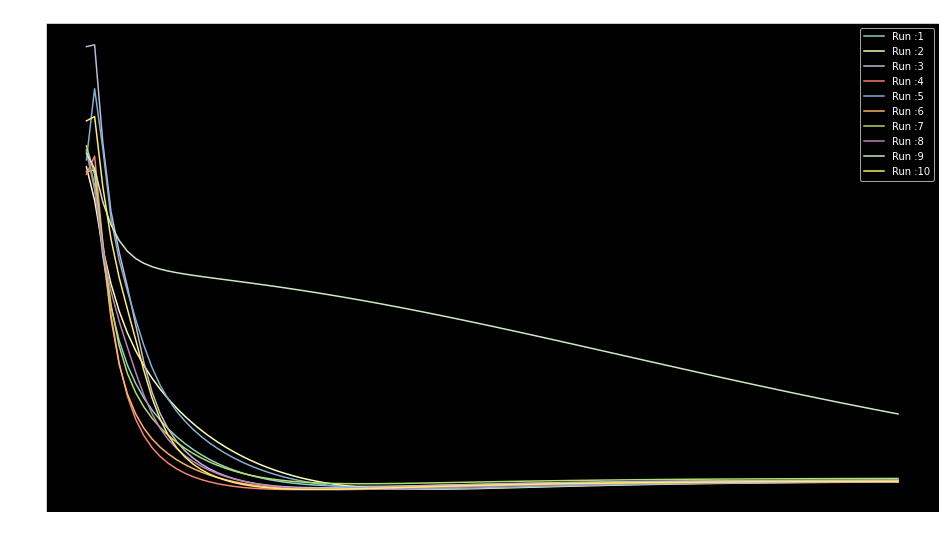

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.style.use("dark_background")
for x in range(1,11):
    plt.plot(np.arange(1,101), loss_list[x - 1], label=f"Run :{x}")
    
plt.title("Loss Expectation Maximization Algorithm with 100 iterations and 10 runs")
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend()

## Observations:
---

- Beginning with the 20th iteration the loss starts to converge to the true parameters